# ThetaScan

## 0. Set-up

In [1]:
import sys
import os
import numpy as np

In [2]:
sys.path.append(os.path.abspath("../package"))


In [5]:
import ThetaScan
from ThetaScan.utilities import *
from ThetaScan.ThetaScan import *

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1. Generate synthetic data

In [8]:
N = 3 #number of traces to generate
ts_len = 500 #length of the traces
ts_types=["stationary", "trending", "periodic"]
data, names = generate_ts_dataset(N, ts_len, ts_types)

Generating stationary trace centered at 914...
Generating trending trace with slope 0.59 and intercept 415...
Generating periodic trace with period 32


Select one example trace of each type and plot it 

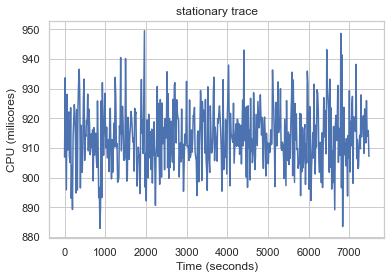

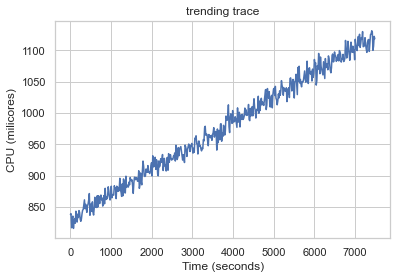

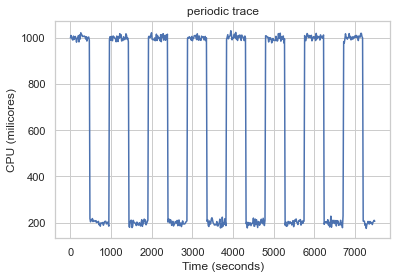

In [9]:
examples = {}
for ts_type in ts_types:
    examples[ts_type] = data[random.choice([i for i, e in enumerate(names) if e == ts_type])]
    
for key in examples:
    plot_trace(examples[key], key + " trace", "CPU (milicores)", trace_legend="CPU Usage")

## 2. Recommend limits

### 2.1 Fixed window 5 minutes

Compute limits with a fixed time window of 5 minutes

In [10]:
TS = ThetaScan()

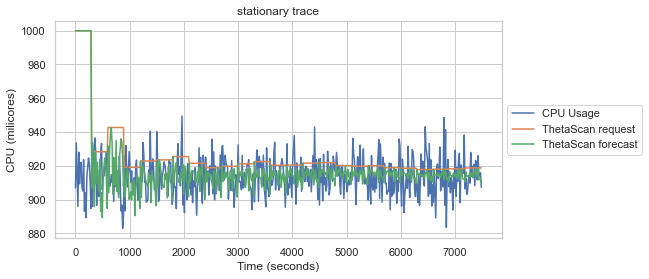

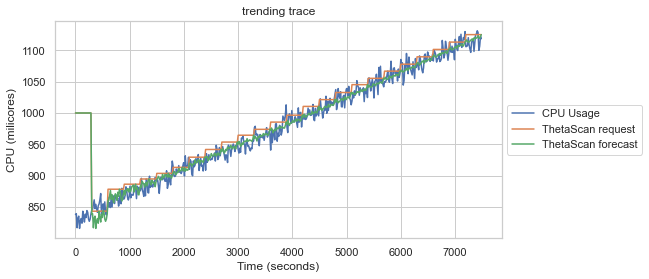

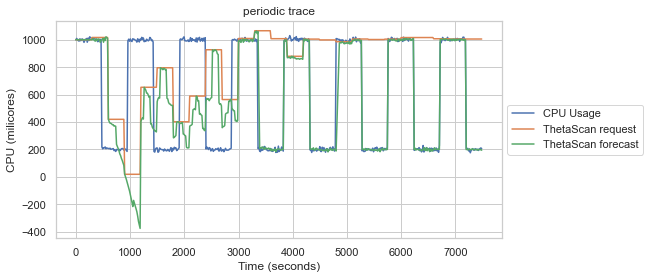

In [11]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.recommend(trace)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")


### 2.1 Dynamic window

Compute limits with a dynamic time window dependent on the detected behaviour

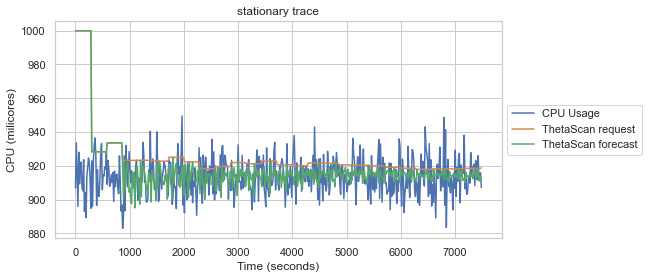

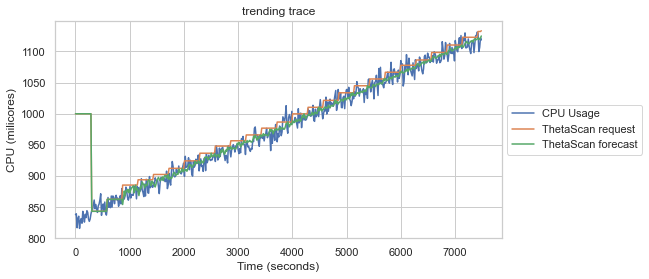

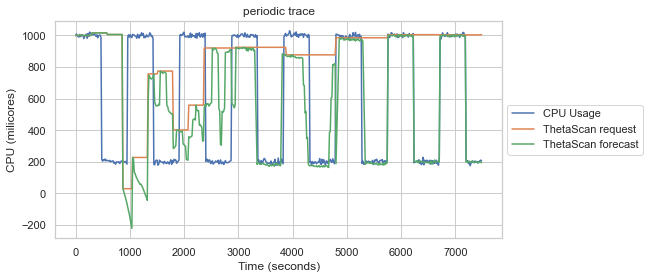

In [12]:
for i, trace in enumerate(data):
    forecasted_request, forecasted_predicted = TS.dynamic_recommend(trace)
    plot_recommendations(trace, forecasted_predicted, forecasted_request, names[i] + " trace")

